In [80]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [68]:
train = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

In [83]:
train_dataset = train.flow_from_directory('/Users/harsh/Downloads/samples',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('/Users/harsh/Downloads/validate',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 312 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [72]:
train_dataset.class_indices

{'No Activity-samples': 0, 'Suspicious Activity-samples': 1}

In [76]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                                          ])

In [86]:
model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(0.001),
                metrics = ['accuracy'])

In [87]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 50,
                     validation_data = validation_dataset
                     )

Epoch 1/50
5/5 [==============================] - 1s 206ms/step - loss: 5.7733 - accuracy: 0.6000 - val_loss: 0.9668 - val_accuracy: 0.4667
Epoch 2/50
5/5 [==============================] - 1s 180ms/step - loss: 0.8798 - accuracy: 0.4667 - val_loss: 0.9335 - val_accuracy: 0.5333
Epoch 3/50
5/5 [==============================] - 1s 181ms/step - loss: 0.7604 - accuracy: 0.8000 - val_loss: 0.2655 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 1s 178ms/step - loss: 0.2209 - accuracy: 0.9333 - val_loss: 0.0692 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 1s 181ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 1s 178ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 1s 180ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 8/50
5/5 [====

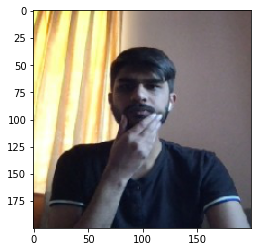

No Activity


In [95]:
dirr = '/Users/harsh/Downloads/samples/No Activity-samples/100.jpg'
img = image.load_img(dirr, target_size = (200,200))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
if val == 0:
    print('No Activity')
elif val == 1:
    print('Suspicious Activity')
    